In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pathlib import Path
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

In [2]:
df = pd.read_csv("/content/2020-2025.csv")
df.head()

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [3]:
display(df.isnull().sum())

,0
Country,0
2020,0
2021,2
2022,2
2023,2
2024,4
2025,7


In [4]:
year_cols = df.columns[1:]  # Only year columns
df[year_cols] = df[year_cols].apply(
    lambda row: row.fillna(row.mean()), axis=1
)
display(df.isnull().sum())

,0
Country,0
2020,0
2021,0
2022,0
2023,0
2024,0
2025,0


,2020,2021,2022,2023,2024,2025
count,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02
mean,4.378886e+05,4.995205e+05,5.204605e+05,5.433356e+05,5.644293e+05,5.805673e+05
std,1.942936e+06,2.209962e+06,2.336347e+06,2.440987e+06,2.547862e+06,2.646492e+06
min,5.200000e+01,6.200000e+01,6.100000e+01,6.300000e+01,6.500000e+01,6.500000e+01
25%,9.588000e+03,1.067050e+04,1.255575e+04,1.317975e+04,1.350050e+04,1.463175e+04
50%,3.533450e+04,3.771900e+04,4.156800e+04,4.363100e+04,4.546600e+04,4.765650e+04
75%,2.074810e+05,2.513878e+05,2.629442e+05,2.755445e+05,2.858750e+05,3.012268e+05
max,2.135412e+07,2.368118e+07,2.600690e+07,2.772072e+07,2.918490e+07,3.050722e+07


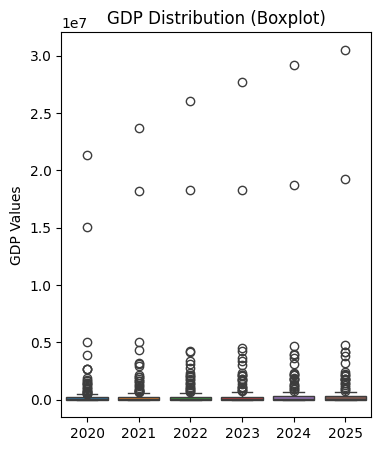

In [6]:
import seaborn as sns
display(df.describe())

# Sirf year wali columns
year_cols = df.columns[1:]

# Boxplot (min, max, median, quartiles)
plt.figure(figsize=(4,5))
sns.boxplot(data=df[year_cols])
plt.title("GDP Distribution (Boxplot)")
plt.ylabel("GDP Values")
plt.show()

In [7]:
df.Country.nunique()

196

In [12]:
year_cols = df.columns[1:]

# Function to highlight Top 5 values in green
def highlight_top5(s):
    is_top5 = s >= s.nlargest(5).min()
    return ['background-color: Yellow' if v else '' for v in is_top5]

# Loop for each year
for year in year_cols:
    print(f"Top 5 countries with Highest GDP in {year}")
    top5 = df.sort_values(by=year, ascending=False).head(5)

    # Style apply only on that year's column
    display(top5.style.apply(highlight_top5, subset=[year]))
    print("-" * 60)

Top 5 countries with Highest GDP in 2020


,Country,2020,2021,2022,2023,2024,2025
186,United States,21354125.000000,23681175.000000,26006900.000000,27720725.000000,29184900.000000,30507217.000000
36,China,15103357.000000,18190803.000000,18307816.000000,18270351.000000,18748009.000000,19231705.000000
85,Japan,5054069.000000,5039148.000000,4262146.000000,4213167.000000,4026211.000000,4186431.000000
64,Germany,3936989.000000,4351188.000000,4166872.000000,4527009.000000,4658526.000000,4744804.000000
185,United Kingdom,2698705.000000,3144079.000000,3125404.000000,3371118.000000,3644636.000000,3839180.000000


------------------------------------------------------------
Top 5 countries with Highest GDP in 2021


,Country,2020,2021,2022,2023,2024,2025
186,United States,21354125.000000,23681175.000000,26006900.000000,27720725.000000,29184900.000000,30507217.000000
36,China,15103357.000000,18190803.000000,18307816.000000,18270351.000000,18748009.000000,19231705.000000
85,Japan,5054069.000000,5039148.000000,4262146.000000,4213167.000000,4026211.000000,4186431.000000
64,Germany,3936989.000000,4351188.000000,4166872.000000,4527009.000000,4658526.000000,4744804.000000
77,India,2674852.000000,3167271.000000,3346107.000000,3638490.000000,3909097.000000,4187017.000000


------------------------------------------------------------
Top 5 countries with Highest GDP in 2022


,Country,2020,2021,2022,2023,2024,2025
186,United States,21354125.000000,23681175.000000,26006900.000000,27720725.000000,29184900.000000,30507217.000000
36,China,15103357.000000,18190803.000000,18307816.000000,18270351.000000,18748009.000000,19231705.000000
85,Japan,5054069.000000,5039148.000000,4262146.000000,4213167.000000,4026211.000000,4186431.000000
64,Germany,3936989.000000,4351188.000000,4166872.000000,4527009.000000,4658526.000000,4744804.000000
77,India,2674852.000000,3167271.000000,3346107.000000,3638490.000000,3909097.000000,4187017.000000


------------------------------------------------------------
Top 5 countries with Highest GDP in 2023


,Country,2020,2021,2022,2023,2024,2025
186,United States,21354125.000000,23681175.000000,26006900.000000,27720725.000000,29184900.000000,30507217.000000
36,China,15103357.000000,18190803.000000,18307816.000000,18270351.000000,18748009.000000,19231705.000000
64,Germany,3936989.000000,4351188.000000,4166872.000000,4527009.000000,4658526.000000,4744804.000000
85,Japan,5054069.000000,5039148.000000,4262146.000000,4213167.000000,4026211.000000,4186431.000000
77,India,2674852.000000,3167271.000000,3346107.000000,3638490.000000,3909097.000000,4187017.000000


------------------------------------------------------------
Top 5 countries with Highest GDP in 2024


,Country,2020,2021,2022,2023,2024,2025
186,United States,21354125.000000,23681175.000000,26006900.000000,27720725.000000,29184900.000000,30507217.000000
36,China,15103357.000000,18190803.000000,18307816.000000,18270351.000000,18748009.000000,19231705.000000
64,Germany,3936989.000000,4351188.000000,4166872.000000,4527009.000000,4658526.000000,4744804.000000
85,Japan,5054069.000000,5039148.000000,4262146.000000,4213167.000000,4026211.000000,4186431.000000
77,India,2674852.000000,3167271.000000,3346107.000000,3638490.000000,3909097.000000,4187017.000000


------------------------------------------------------------
Top 5 countries with Highest GDP in 2025


,Country,2020,2021,2022,2023,2024,2025
186,United States,21354125.000000,23681175.000000,26006900.000000,27720725.000000,29184900.000000,30507217.000000
36,China,15103357.000000,18190803.000000,18307816.000000,18270351.000000,18748009.000000,19231705.000000
64,Germany,3936989.000000,4351188.000000,4166872.000000,4527009.000000,4658526.000000,4744804.000000
77,India,2674852.000000,3167271.000000,3346107.000000,3638490.000000,3909097.000000,4187017.000000
85,Japan,5054069.000000,5039148.000000,4262146.000000,4213167.000000,4026211.000000,4186431.000000


------------------------------------------------------------


In [13]:
year_cols = df.columns[1:]

# Function to highlight Top 5 values in green
def highlight_top5(s):
    is_top5 = s >= s.nlargest(5).min()
    return ['background-color: lightblue' if v else '' for v in is_top5]

# Loop for each year
for year in year_cols:
    print(f"Top 5 countries with Lowest GDP in {year}")
    top5 = df.sort_values(by=year, ascending=True).head(5)

    # Style apply only on that year's column
    display(top5.style.apply(highlight_top5, subset=[year]))
    print("-" * 60)

Top 5 countries with Lowest GDP in 2020


,Country,2020,2021,2022,2023,2024,2025
181,Tuvalu,52.000000,62.000000,61.000000,63.000000,65.000000,65.000000
121,Nauru,125.000000,176.000000,152.000000,152.000000,161.000000,169.000000
89,Kiribati,222.000000,285.000000,271.000000,289.000000,308.000000,312.000000
109,Marshall Islands,242.000000,259.000000,253.000000,259.000000,280.000000,297.000000
132,Palau,259.000000,236.000000,248.000000,275.000000,306.000000,333.000000


------------------------------------------------------------
Top 5 countries with Lowest GDP in 2021


,Country,2020,2021,2022,2023,2024,2025
181,Tuvalu,52.000000,62.000000,61.000000,63.000000,65.000000,65.000000
121,Nauru,125.000000,176.000000,152.000000,152.000000,161.000000,169.000000
132,Palau,259.000000,236.000000,248.000000,275.000000,306.000000,333.000000
109,Marshall Islands,242.000000,259.000000,253.000000,259.000000,280.000000,297.000000
89,Kiribati,222.000000,285.000000,271.000000,289.000000,308.000000,312.000000


------------------------------------------------------------
Top 5 countries with Lowest GDP in 2022


,Country,2020,2021,2022,2023,2024,2025
181,Tuvalu,52.000000,62.000000,61.000000,63.000000,65.000000,65.000000
121,Nauru,125.000000,176.000000,152.000000,152.000000,161.000000,169.000000
132,Palau,259.000000,236.000000,248.000000,275.000000,306.000000,333.000000
109,Marshall Islands,242.000000,259.000000,253.000000,259.000000,280.000000,297.000000
89,Kiribati,222.000000,285.000000,271.000000,289.000000,308.000000,312.000000


------------------------------------------------------------
Top 5 countries with Lowest GDP in 2023


,Country,2020,2021,2022,2023,2024,2025
181,Tuvalu,52.000000,62.000000,61.000000,63.000000,65.000000,65.000000
121,Nauru,125.000000,176.000000,152.000000,152.000000,161.000000,169.000000
109,Marshall Islands,242.000000,259.000000,253.000000,259.000000,280.000000,297.000000
132,Palau,259.000000,236.000000,248.000000,275.000000,306.000000,333.000000
89,Kiribati,222.000000,285.000000,271.000000,289.000000,308.000000,312.000000


------------------------------------------------------------
Top 5 countries with Lowest GDP in 2024


,Country,2020,2021,2022,2023,2024,2025
181,Tuvalu,52.000000,62.000000,61.000000,63.000000,65.000000,65.000000
121,Nauru,125.000000,176.000000,152.000000,152.000000,161.000000,169.000000
109,Marshall Islands,242.000000,259.000000,253.000000,259.000000,280.000000,297.000000
132,Palau,259.000000,236.000000,248.000000,275.000000,306.000000,333.000000
89,Kiribati,222.000000,285.000000,271.000000,289.000000,308.000000,312.000000


------------------------------------------------------------
Top 5 countries with Lowest GDP in 2025


,Country,2020,2021,2022,2023,2024,2025
181,Tuvalu,52.000000,62.000000,61.000000,63.000000,65.000000,65.000000
121,Nauru,125.000000,176.000000,152.000000,152.000000,161.000000,169.000000
109,Marshall Islands,242.000000,259.000000,253.000000,259.000000,280.000000,297.000000
89,Kiribati,222.000000,285.000000,271.000000,289.000000,308.000000,312.000000
132,Palau,259.000000,236.000000,248.000000,275.000000,306.000000,333.000000


------------------------------------------------------------


In [14]:
# ---- Numeric growth column ----
df["2020-2025_growth"] = (df["2025"] - df["2020"]) / df["2020"] * 100

# ---- Top 10 by numeric growth ----
top10 = df.sort_values(by="2020-2025_growth", ascending=False).head(10).copy()

# ---- Display column with % sign ----
top10["2020-2025%"] = top10["2020-2025_growth"].map(lambda x: f"{x:.2f}%")

# ---- Remove numeric column (optional) ----
top10.drop(columns="2020-2025_growth", inplace=True)

# ---- Highlight growth column in green ----
def highlight_green(s):
    return ['background-color: lightgreen' for _ in s]

display(top10.style.apply(highlight_green, subset=["2020-2025%"]))

,Country,2020,2021,2022,2023,2024,2025,2020-2025%
71,Guyana,5471.000000,8041.000000,14718.000000,16919.000000,24659.000000,25822.000000,371.98%
190,Venezuela,42838.000000,56615.000000,89013.000000,102377.000000,119808.000000,108511.000000,153.31%
93,Kyrgyzstan,8283.000000,9256.000000,12269.000000,15187.000000,17491.000000,19849.000000,139.64%
72,Haiti,14508.000000,21017.000000,19826.000000,19603.000000,26229.000000,33548.000000,131.24%
63,Georgia,16013.000000,18849.000000,24985.000000,30778.000000,33775.000000,35353.000000,120.78%
28,Burundi,3089.000000,3356.000000,3922.000000,4246.000000,4743.000000,6745.000000,118.36%
69,Guinea,14089.000000,16320.000000,19589.000000,22750.000000,25758.000000,30094.000000,113.60%
102,Macau,25344.000000,30969.000000,24998.000000,45802.000000,50182.000000,53354.000000,110.52%
7,Armenia,12642.000000,13879.000000,19514.000000,24086.000000,25533.000000,26258.000000,107.70%
106,Maldives,3706.000000,5242.000000,6168.000000,6581.000000,7019.000000,7480.000000,101.83%


In [15]:
# ---- Numeric growth column ----
df["2020-2025_growth"] = (df["2025"] - df["2020"]) / df["2020"] * 100

# ---- Top 10 by numeric growth ----
top10 = df.sort_values(by="2020-2025_growth", ascending=True).head(10).copy()

# ---- Display column with % sign ----
top10["2020-2025%"] = top10["2020-2025_growth"].map(lambda x: f"{x:.2f}%")

# ---- Remove numeric column (optional) ----
top10.drop(columns="2020-2025_growth", inplace=True)

# ---- Highlight growth column in green ----
def highlight_green(s):
    return ['background-color: lightcoral' for _ in s]

display(top10.style.apply(highlight_green, subset=["2020-2025%"]))

,Country,2020,2021,2022,2023,2024,2025,2020-2025%
127,Nigeria,432299.000000,441074.000000,476468.000000,363816.000000,187640.000000,188271.000000,-56.45%
159,South Sudan,5423.000000,5940.000000,8037.000000,7186.000000,5423.000000,3998.000000,-26.28%
0,Afghanistan,20136.000000,14278.000000,14501.000000,17248.000000,16540.750000,16540.750000,-17.85%
85,Japan,5054069.000000,5039148.000000,4262146.000000,4213167.000000,4026211.000000,4186431.000000,-17.17%
193,Yemen,20220.000000,19394.000000,23534.000000,19412.000000,19101.000000,17401.000000,-13.94%
94,Laos,18511.000000,18533.000000,15121.000000,14978.000000,15879.000000,16322.000000,-11.83%
165,Sudan,35237.000000,35142.000000,33517.000000,36998.000000,28270.000000,31506.000000,-10.59%
51,Egypt,382525.000000,423300.000000,475231.000000,393828.000000,383109.000000,347342.000000,-9.20%
96,Lebanon,24976.000000,19782.000000,24748.000000,23607.000000,28280.000000,24278.600000,-2.79%
174,Timor-Leste,2163.000000,3625.000000,3209.000000,2080.000000,2015.000000,2115.000000,-2.22%


In [16]:
# Ensure all columns are strings
df.columns = [str(c).strip() for c in df.columns]

# Identify only year columns (must be digits)
year_cols = [c for c in df.columns if c.isdigit()]

# Convert year columns to numeric GDP values
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors="coerce")

# Fill missing values row-wise (forward + backward)
df[year_cols] = df[year_cols].ffill(axis=1).bfill(axis=1)

# Melt into tidy format
tidy = df.melt(
    id_vars="Country",
    value_vars=year_cols,
    var_name="Year",
    value_name="GDP"
)

# Convert Year safely
tidy["Year"] = tidy["Year"].astype(int)

# Ensure GDP is numeric
tidy["GDP"] = pd.to_numeric(tidy["GDP"], errors="coerce")

# Sort and rank
tidy = tidy.sort_values(["Year", "GDP"], ascending=[True, False]).reset_index(drop=True)
tidy["Rank"] = tidy.groupby("Year")["GDP"].rank(method="first", ascending=False)

tidy.head(15)  # check output

,Country,Year,GDP,Rank
0,United States,2020,21354125.0,1.0
1,China,2020,15103357.0,2.0
2,Japan,2020,5054069.0,3.0
3,Germany,2020,3936989.0,4.0
4,United Kingdom,2020,2698705.0,5.0
5,India,2020,2674852.0,6.0
6,France,2020,2645806.0,7.0
7,Italy,2020,1905956.0,8.0
8,South Korea,2020,1744456.0,9.0
9,Canada,2020,1655685.0,10.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['GDP'].plot(kind='hist', bins=20, title='GDP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Rank'].plot(kind='hist', bins=20, title='Rank')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='GDP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='GDP', y='Rank', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['GDP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('GDP')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['GDP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('GDP')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['GDP'].plot(kind='line', figsize=(8, 4), title='GDP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Rank'].plot(kind='line', figsize=(8, 4), title='Rank')
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:
def pick_countries(n=10, by_year=2025, min_gdp=None, include=None):
    """
    Pick a set of countries to plot lines for.
    - n: top-N by GDP in `by_year`
    - min_gdp: minimum GDP threshold in `by_year` (overrides n if used)
    - include: list of country names to always include
    """
    # Filter for given year
    year_df = tidy[tidy["Year"] == by_year].dropna(subset=["GDP"])
    if year_df.empty:
        raise ValueError(f"No data found for year {by_year}")

    chosen = set()

    if min_gdp is not None:
        # All countries above GDP threshold
        chosen.update(year_df.loc[year_df["GDP"] >= min_gdp, "Country"].tolist())
    else:
       # Top N by GDP
        chosen.update(
            year_df.sort_values("GDP", ascending=False).head(n)["Country"].tolist()
        )

    # Always include these countries if provided
    if include:
        if isinstance(include, str):  # single country string
            chosen.add(include)
        else:  # list or set
            chosen.update(include)

    return sorted(chosen)

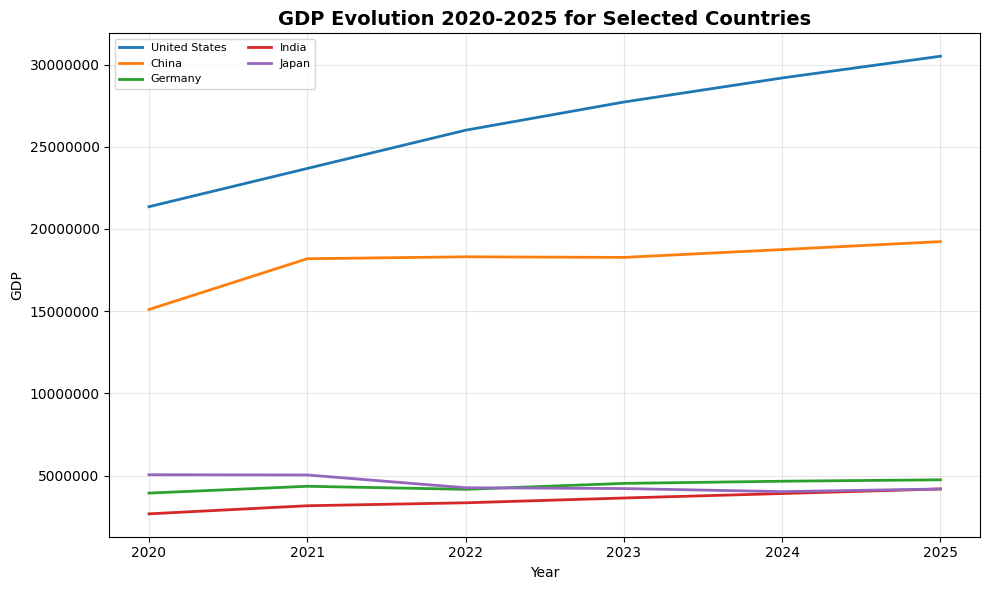

In [18]:
def plot_lines(countries=None, start=2020, end=2025, n_top=5):
    # Filter years
    data = tidy[(tidy["Year"] >= start) & (tidy["Year"] <= end)]

    # Agar countries na di gayi ho to top-N by GDP in "end" year
    if countries is None:
        countries = (
            data[data["Year"] == end]
            .sort_values("GDP", ascending=False)
            .head(n_top)["Country"]
            .tolist()
        )

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    for c in countries:
        sub = data[data["Country"] == c].sort_values("Year")
        if not sub.empty:  # skip if no data for that country
            ax.plot(sub["Year"], sub["GDP"], label=c, linewidth=2)

    # Dynamic title
    if countries is None:
       title = f"Top {n_top} Countries: GDP Evolution {start}-{end}"
    else:
        title = f"GDP Evolution {start}-{end} for Selected Countries"

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("Year")
    ax.set_ylabel("GDP")

    # Formatting
    ax.grid(True, alpha=0.3)
    ax.legend(loc="best", fontsize=8, ncol=2)
    ax.ticklabel_format(style="plain", axis="y")  # avoid scientific notation

    plt.tight_layout()
    plt.show()

# Example usage
plot_lines()               # Top 5 auto
# plot_lines(["Pakistan","India","China"], start=2010, end=2025)  # Custom

In [21]:
def bar_chart_race(save_path="bar_chart_race.mp4", top_n=10, start=2020, end=2025, fps=2):
    years = list(range(start, end+1))
    frames = []

    # Prepare top-N frames
    for y in years:
        frame = (
            tidy[tidy["Year"] == y]
            .nlargest(top_n, "GDP")
            .sort_values("GDP", ascending=True)  # bottom to top
        )
        frames.append(frame)

    # Figure
    fig, ax = plt.subplots(figsize=(7, 5))

    def update(i):
        frame = frames[i]
        ax.clear()
        ax.barh(frame["Country"], frame["GDP"], color="skyblue")
        ax.set_xlabel("GDP")
        ax.set_xlim(0, frame["GDP"].max() * 1.1)  # thoda space right me
        ax.set_title(f"Top {top_n} GDP — {years[i]}")
        ax.grid(True, axis="x", alpha=0.3)

    anim = FuncAnimation(fig, update, frames=len(years), interval=1000//fps, repeat=False)

    try:
        anim.save(save_path, fps=fps, dpi=150)
        print(f" Saved animation: {Path(save_path).resolve()}")
    except Exception as e:
        print(" Could not save video (maybe ffmpeg missing). Showing inline instead.\n", e)
        plt.show()

 Saved animation: /content/bar_chart_race.mp4


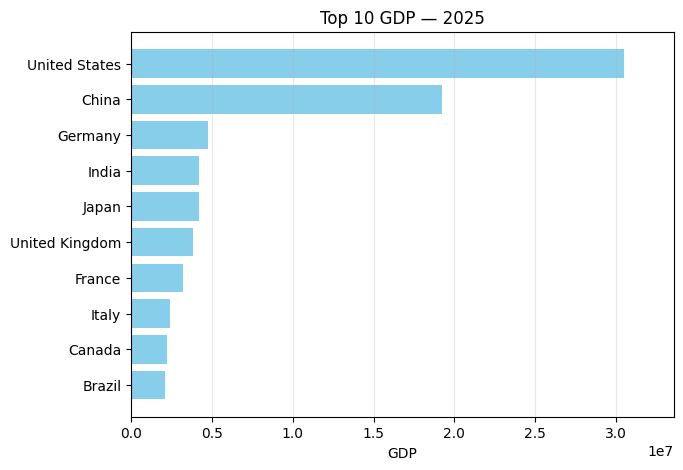

In [22]:
bar_chart_race()

In [28]:
# ---- Growth % calculate ----
df["Growth%"] = (df["2025"] - df["2020"]) / df["2020"] * 100

# ---- Widgets ----
top_n_selector = widgets.IntSlider(
    value=5,
    min=2,
    max=40,
    step=1,
    description="Top N Countries:",
    style={'description_width': 'initial'},
    continuous_update=False
)

mode_selector = widgets.ToggleButtons(
    options=["Gain", "Drop"],
    value="Gain",
    description="View Mode:",
    style={'description_width': 'initial'}
)

In [36]:
# ---- Update Function ----
def update_dashboard(top_n, mode):
    if mode == "Gain":
        data = df.nlargest(top_n, "Growth%").copy()
        title = f"Top {top_n} Countries with Highest GDP Growth (2020–2025)"
        colors = ["darkgreen"] + ["lightgreen"] * (len(data) - 1)
    else:
        data = df.nsmallest(top_n, "Growth%").copy()
        title = f"Top {top_n} Countries with Sharpest GDP Drop (2020–2025)"
        colors = ["darkred"] + ["lightcoral"] * (len(data) - 1)

    # Plot with manual colors
    fig = px.bar(
        data,
        x="Country",
        y="Growth%",
        text=data["Growth%"].round(2).astype(str) + "%",
        title=title
    )

    # Apply custom colors
    fig.update_traces(marker_color=colors, textposition="outside")
    fig.update_layout(
        width=1000,
        height=800,
        yaxis_title="Growth %",
        xaxis_title="Country",
        title_font_size=34
    )
    fig.show()

In [37]:
# ---- Display Interactive ----
ui = widgets.VBox([top_n_selector, mode_selector])
out = widgets.interactive_output(update_dashboard, {"top_n": top_n_selector, "mode": mode_selector})

display(ui, out)

Output()